# Business Case: Predicting future Flight Prices

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                      

sns.set()
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

**Since data is in the form of excel file we have to use pandas read_excel to load the data.**


In [2]:
data=pd.read_excel("Flight_Fare.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Domain Analysis

1. **Airline** :So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2. **Date_of_Journey** : This column will let us know about the date on which the passenger’s journey will start.
3. **Source** : This column holds the name of the place from where the passenger’s journey will start.
4. **Destination** : This column holds the name of the place to where passengers wanted to travel.
5. **Route** : Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
6. **Dep_Time** : Departure time is when a plane leaves the gate.
7. **Arrival_Time** : Arrival time is when the passenger will reach his/her destination.
8. **Duration** : Duration is the whole period that a flight will take to complete its journey from source to destination.
9. **Total_Stops** : This will let us know in how many places flights will stop there for the flight in the whole journey.
10. **Additional_Info** : In this column, we will get information about food, kind of food, and other amenities.
11. **Price** : Price of the flight for a complete journey including all the expenses before onboarding.

# Basic checks

In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.shape

(10683, 11)

In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* **Datatypes of all the columns are object except the 'Price' column.**
* **Since the dependent variable 'Price' is continuous,we can consider this as a regression problem**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* **Non-null count of all the columns are 10683 except 'Route' & 'Total_Stops'.**
* **ie; there are null values present in both the columns 'Route' & 'Total_Stops' .**

In [9]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

### Checking for missing value

**1. After loading , it is important to check null values in a column or a row.**
 
 **2. If it is present then following can be done ;**

* **Filling NaN values with mean, median and mode using fillna() method.**
* **If less missing values, we can drop it as well.**

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data[data['Route'].isna() | data['Total_Stops'].isna()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Hence, there are no missing values.**

In [14]:
data.shape

(10682, 11)

# Exploratory Data Analysis

## Data Cleaning

In [15]:
#Date_of_Journey is a object data type,
#Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

#For this we require pandas to_datetime to convert object data type to datetime dtype.

#.dt.day method will extract only day of that date
#.dt.month method will extract only month of that date

In [16]:

data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data["Journey_month"] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y').dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [18]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hour
data['Dep_Hr'] = pd.to_datetime(data['Dep_Time']).dt.hour

# Extracting Minutes
data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(['Dep_Time'], axis = 1, inplace = True)

In [19]:

data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data['Arr_Hr'] = pd.to_datetime(data['Arrival_Time']).dt.hour

# Extracting Minutes
data['Arr_Min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop('Arrival_Time', axis = 1, inplace = True)

In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_Hr"] = duration_hours
data["Duration_Min"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True)

In [24]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
Journey_month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Dep_Hr,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
Dep_Min,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
Arr_Hr,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
Arr_Min,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0
Duration_Hr,10682.0,10.244898,8.494916,0.0,2.0,8.0,15.0,47.0
Duration_Min,10682.0,28.326624,16.945817,0.0,15.0,30.0,45.0,55.0


**Insights**:

   * **Price: The average price of the flights is around 9,087.21, with a standard deviation of 4,611.55. The prices range from 1,759 to 79,512. The prices vary significantly, indicating that there are flights with different price ranges in the dataset.**
   * **Day and Month: The average day of the month for the flights is around 13.51, with a standard deviation of 8.48. The average month is approximately 4.71, with a standard deviation of 1.16. This suggests that the dataset contains flights from different days and months, indicating a range of temporal coverage.**
   * **Departure Time: The average departure hour is approximately 12.49, with a standard deviation of 5.75. The average departure minute is around 24.41, with a standard deviation of 18.77. This indicates that the flights in the dataset have varied departure times throughout the day.**
   * **Arrival Time: The average arrival hour is approximately 13.35, with a standard deviation of 6.86. The average arrival minute is around 24.69, with a standard deviation of 16.51. Similar to departure time, this suggests that the flights have different arrival times throughout the day.**
   * **Duration: The average duration in hour is 10.24 hours, with a 25th percentile at 2 hours and a 75th percentile at 15 hours. The duration can range from as low as 0 hours to a maximum of 47 hours. The average duration of the flights is relatively lower compared to the maximum duration. The average duration in minutes is 28.33 minutes, with a 25th percentile at 15 minutes and a 75th percentile at 45 minutes. The minimum duration is 0 minutes, and the maximum is 55 minutes.**

In [26]:
data.describe(include="O").T

,count,unique,top,freq
Airline,10682,12,Jet Airways,3849
Source,10682,5,Delhi,4536
Destination,10682,6,Cochin,4536
Route,10682,128,DEL → BOM → COK,2376
Total_Stops,10682,5,1 stop,5625
Additional_Info,10682,10,No info,8344


**Insights**:
    
   * **Airline: The dataset contains information from 12 unique airlines. The most common airline in the dataset is Jet Airways, which appears 3,849 times.**

   * **Source: The dataset includes flights originating from 5 different sources. The most common source is Delhi, with 4,536 flights originating from there.**

   * **Destination: The dataset includes flights going to 6 different destinations. The most common destination is Cochin, with 4,536 flights arriving there.**

   * **Route: The dataset consists of 128 unique routes taken by the flights. The most frequent route is "DEL → BOM → COK," which appears 2,376 times.**

   * **Total_Stops: The flights in the dataset have a range of total stops, ranging from 0 stops to 4 stops. The most common number of stops is 1 stop, with 5,625 flights having this configuration.**

   * **Additional_Info: The dataset contains additional information about the flights. There are 10 unique additional information categories. The most common additional information is "No info," which appears 8,344 times.**

In [27]:
cate_val=[column for column in data.columns if data[column].dtype=='object']
cate_val

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [28]:
cont_val=[column for column in data.columns if data[column].dtype!='object']
cont_val

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Hr',
 'Dep_Min',
 'Arr_Hr',
 'Arr_Min',
 'Duration_Hr',
 'Duration_Min']

## Handling categorical data

 1. **Nominal data** --> data are not in any order -->
   __OneHotEncoder__ is used in this case
 2. **Ordinal data** --> data are in order -->
   __LabelEncoder__ is used in this case**

In [29]:
data[cate_val].head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


### Airline

In [30]:

data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

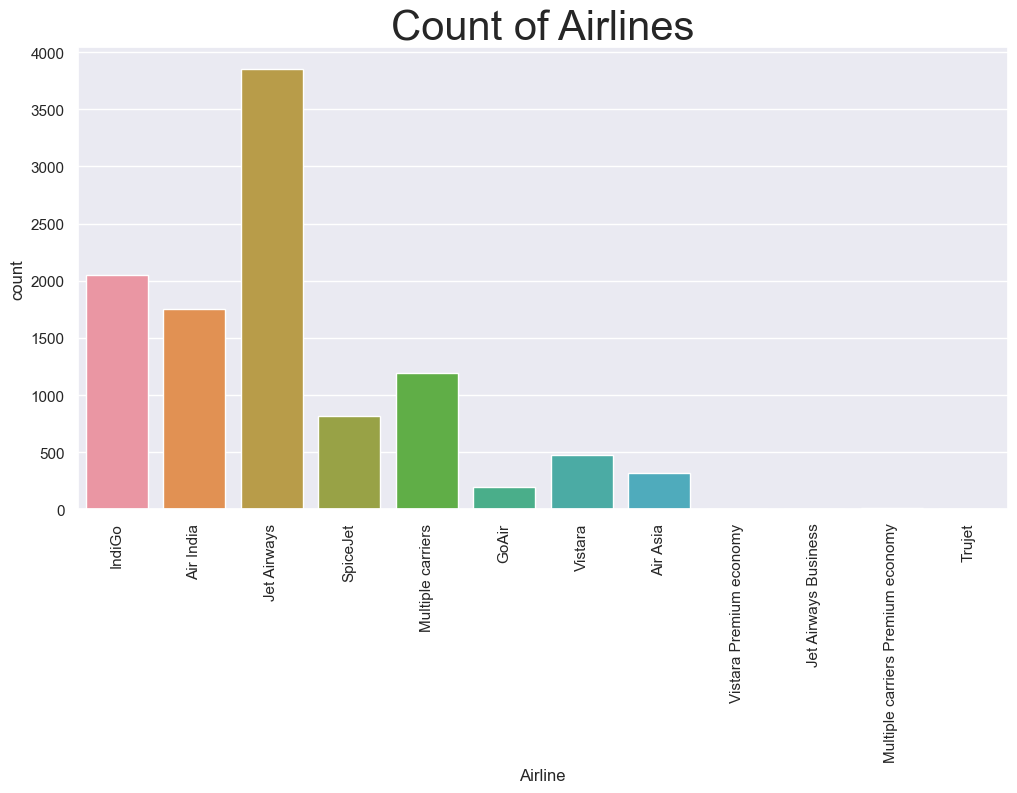

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Airline')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

### **Insight**:
   * **Jet Airways becaming as a most popular Airline**

<Figure size 1200x600 with 0 Axes>

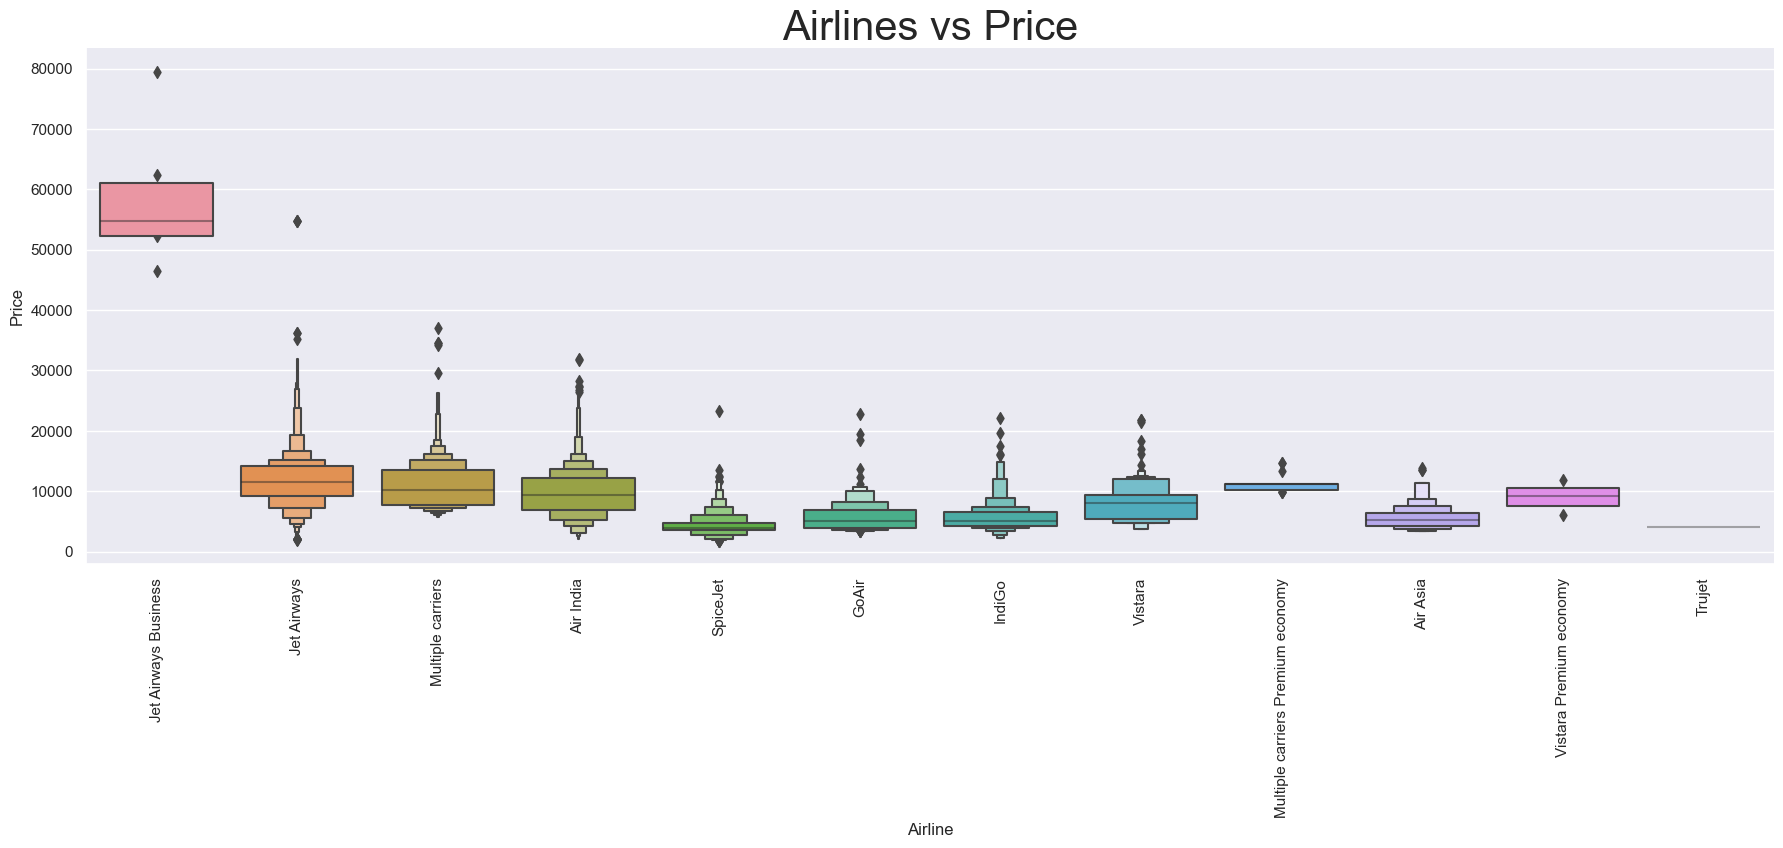

In [32]:
plt.figure(figsize=(12,6))
sns.catplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

### **Insight**:
 * **From the graph we can see that Jet Airways Business have the highest price**
 * **Apart from Jet Airways, almost all are having similar median**

In [33]:
#Since Airline is a Nominal Categorical data we will perform OneHotEncoding

Airline = data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [34]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

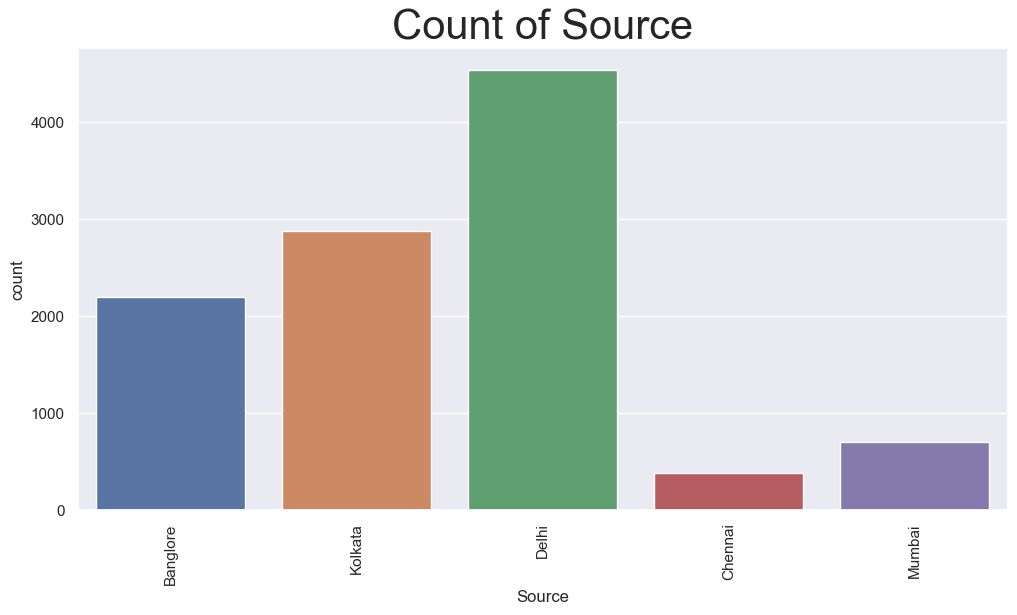

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Source')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

### Insight:
**The Source 'Delhi' plays an important role compared to other sources.**

<Figure size 1200x600 with 0 Axes>

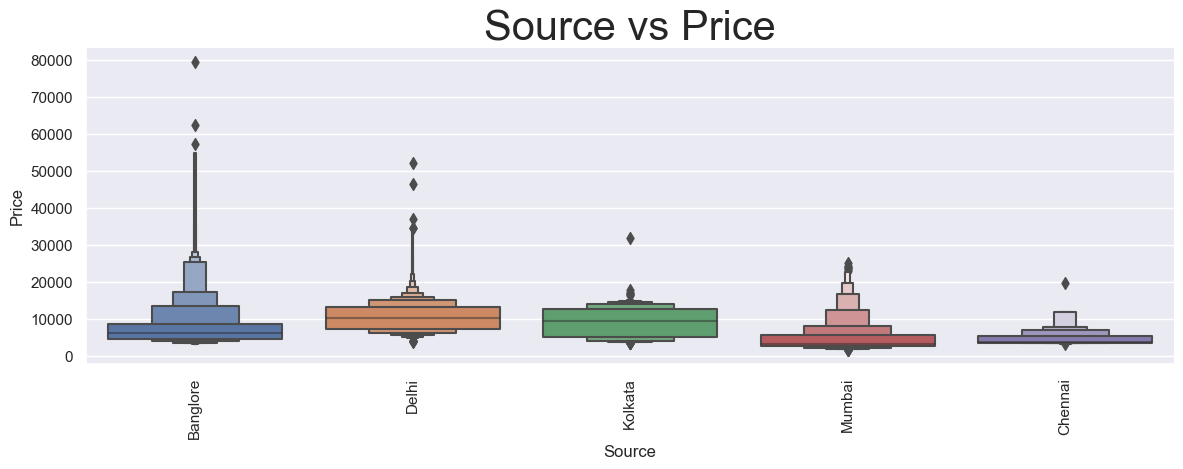

In [36]:
plt.figure(figsize=(12,6))
sns.catplot(x = 'Source', y = 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 4, aspect = 3)
plt.title('Source vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

### **Insight**:
    
   * **Flights taking off from Banglore is expensive than others.**
   * **And the flights taking off from Chennai & Kolkata are least expensive compared to others.**

In [37]:
#Since Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[['Source']]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination

In [38]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1200x600 with 0 Axes>

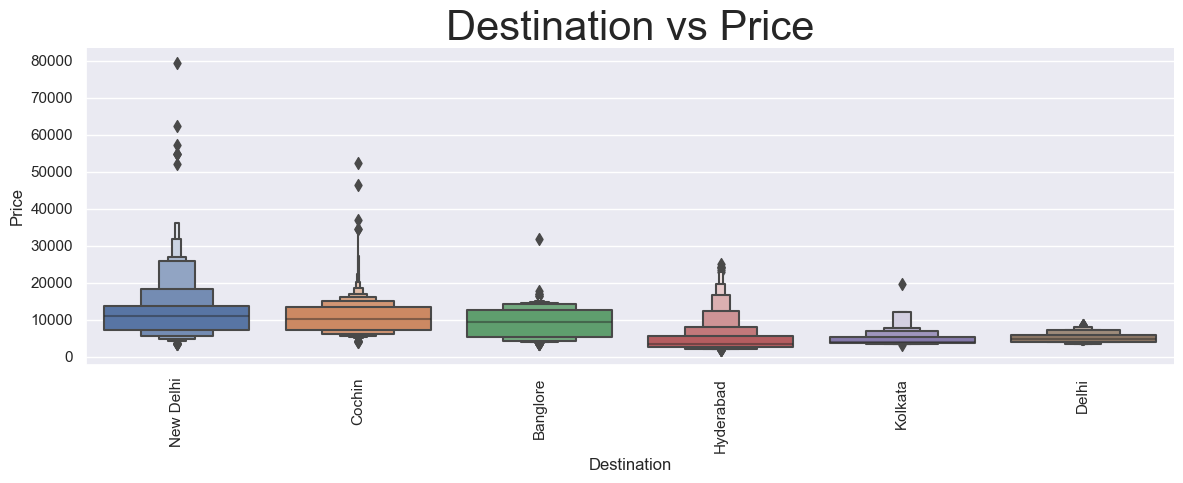

In [39]:
plt.figure(figsize=(12,6))
sns.catplot(x = 'Destination', y = 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 4, aspect = 3)
plt.title('Destination vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

* **Flights landing in New Delhi and Cochin are expensive compared to others.**
* **Flights landing in Delhi is least expensive compared to others.**

In [40]:
# Since Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Route 

In [41]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [42]:
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]

In [43]:
data.drop(['Route'], axis = 1, inplace = True)

In [44]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [45]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_day            0
Journey_month          0
Dep_Hr                 0
Dep_Min                0
Arr_Hr                 0
Arr_Min                0
Duration_Hr            0
Duration_Min           0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

* **There are null values present in Route3, Route4 and Route5.**
* **So,we use .fillna() to replace it.**

In [46]:
for i in ['Route3', 'Route4', 'Route5']:
    data[i].fillna('None',inplace=True)

In [47]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_Hr             0
Dep_Min            0
Arr_Hr             0
Arr_Min            0
Duration_Hr        0
Duration_Min       0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

**Hence there are no null values present in any column.**

In [48]:
for i in data.columns:
    print('{} has total {} data'.format(i,len(data[i].value_counts())))

Airline has total 12 data
Source has total 5 data
Destination has total 6 data
Total_Stops has total 5 data
Additional_Info has total 10 data
Price has total 1870 data
Journey_day has total 10 data
Journey_month has total 4 data
Dep_Hr has total 24 data
Dep_Min has total 12 data
Arr_Hr has total 24 data
Arr_Min has total 12 data
Duration_Hr has total 44 data
Duration_Min has total 12 data
Route1 has total 5 data
Route2 has total 45 data
Route3 has total 30 data
Route4 has total 14 data
Route5 has total 6 data


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    data[i]=encoder.fit_transform(data[i])

In [51]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


### Total_Stops

In [52]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [53]:
# Since Total_Stops is an Ordinal Categorical data we will perform LabelEncoder
# Here Values are assigned with corresponding keys

data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


### Additional_Info

In [54]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

**Analyzing the data, we notice that the Additional_Info column has mostly no information. We decide to drop it.**

In [55]:
data.drop('Additional_Info',axis=1,inplace=True)

In [56]:
# Concatenating dataframe - data + Airline + Source + Destination

data1 = pd.concat([data, Airline, Source, Destination], axis = 1)

In [57]:
data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [58]:
data1.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)
data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [59]:
data1.shape

(10682, 35)

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

 1. **heatmap**
 2. **feature_importance_**
 3. **SelectKBest**


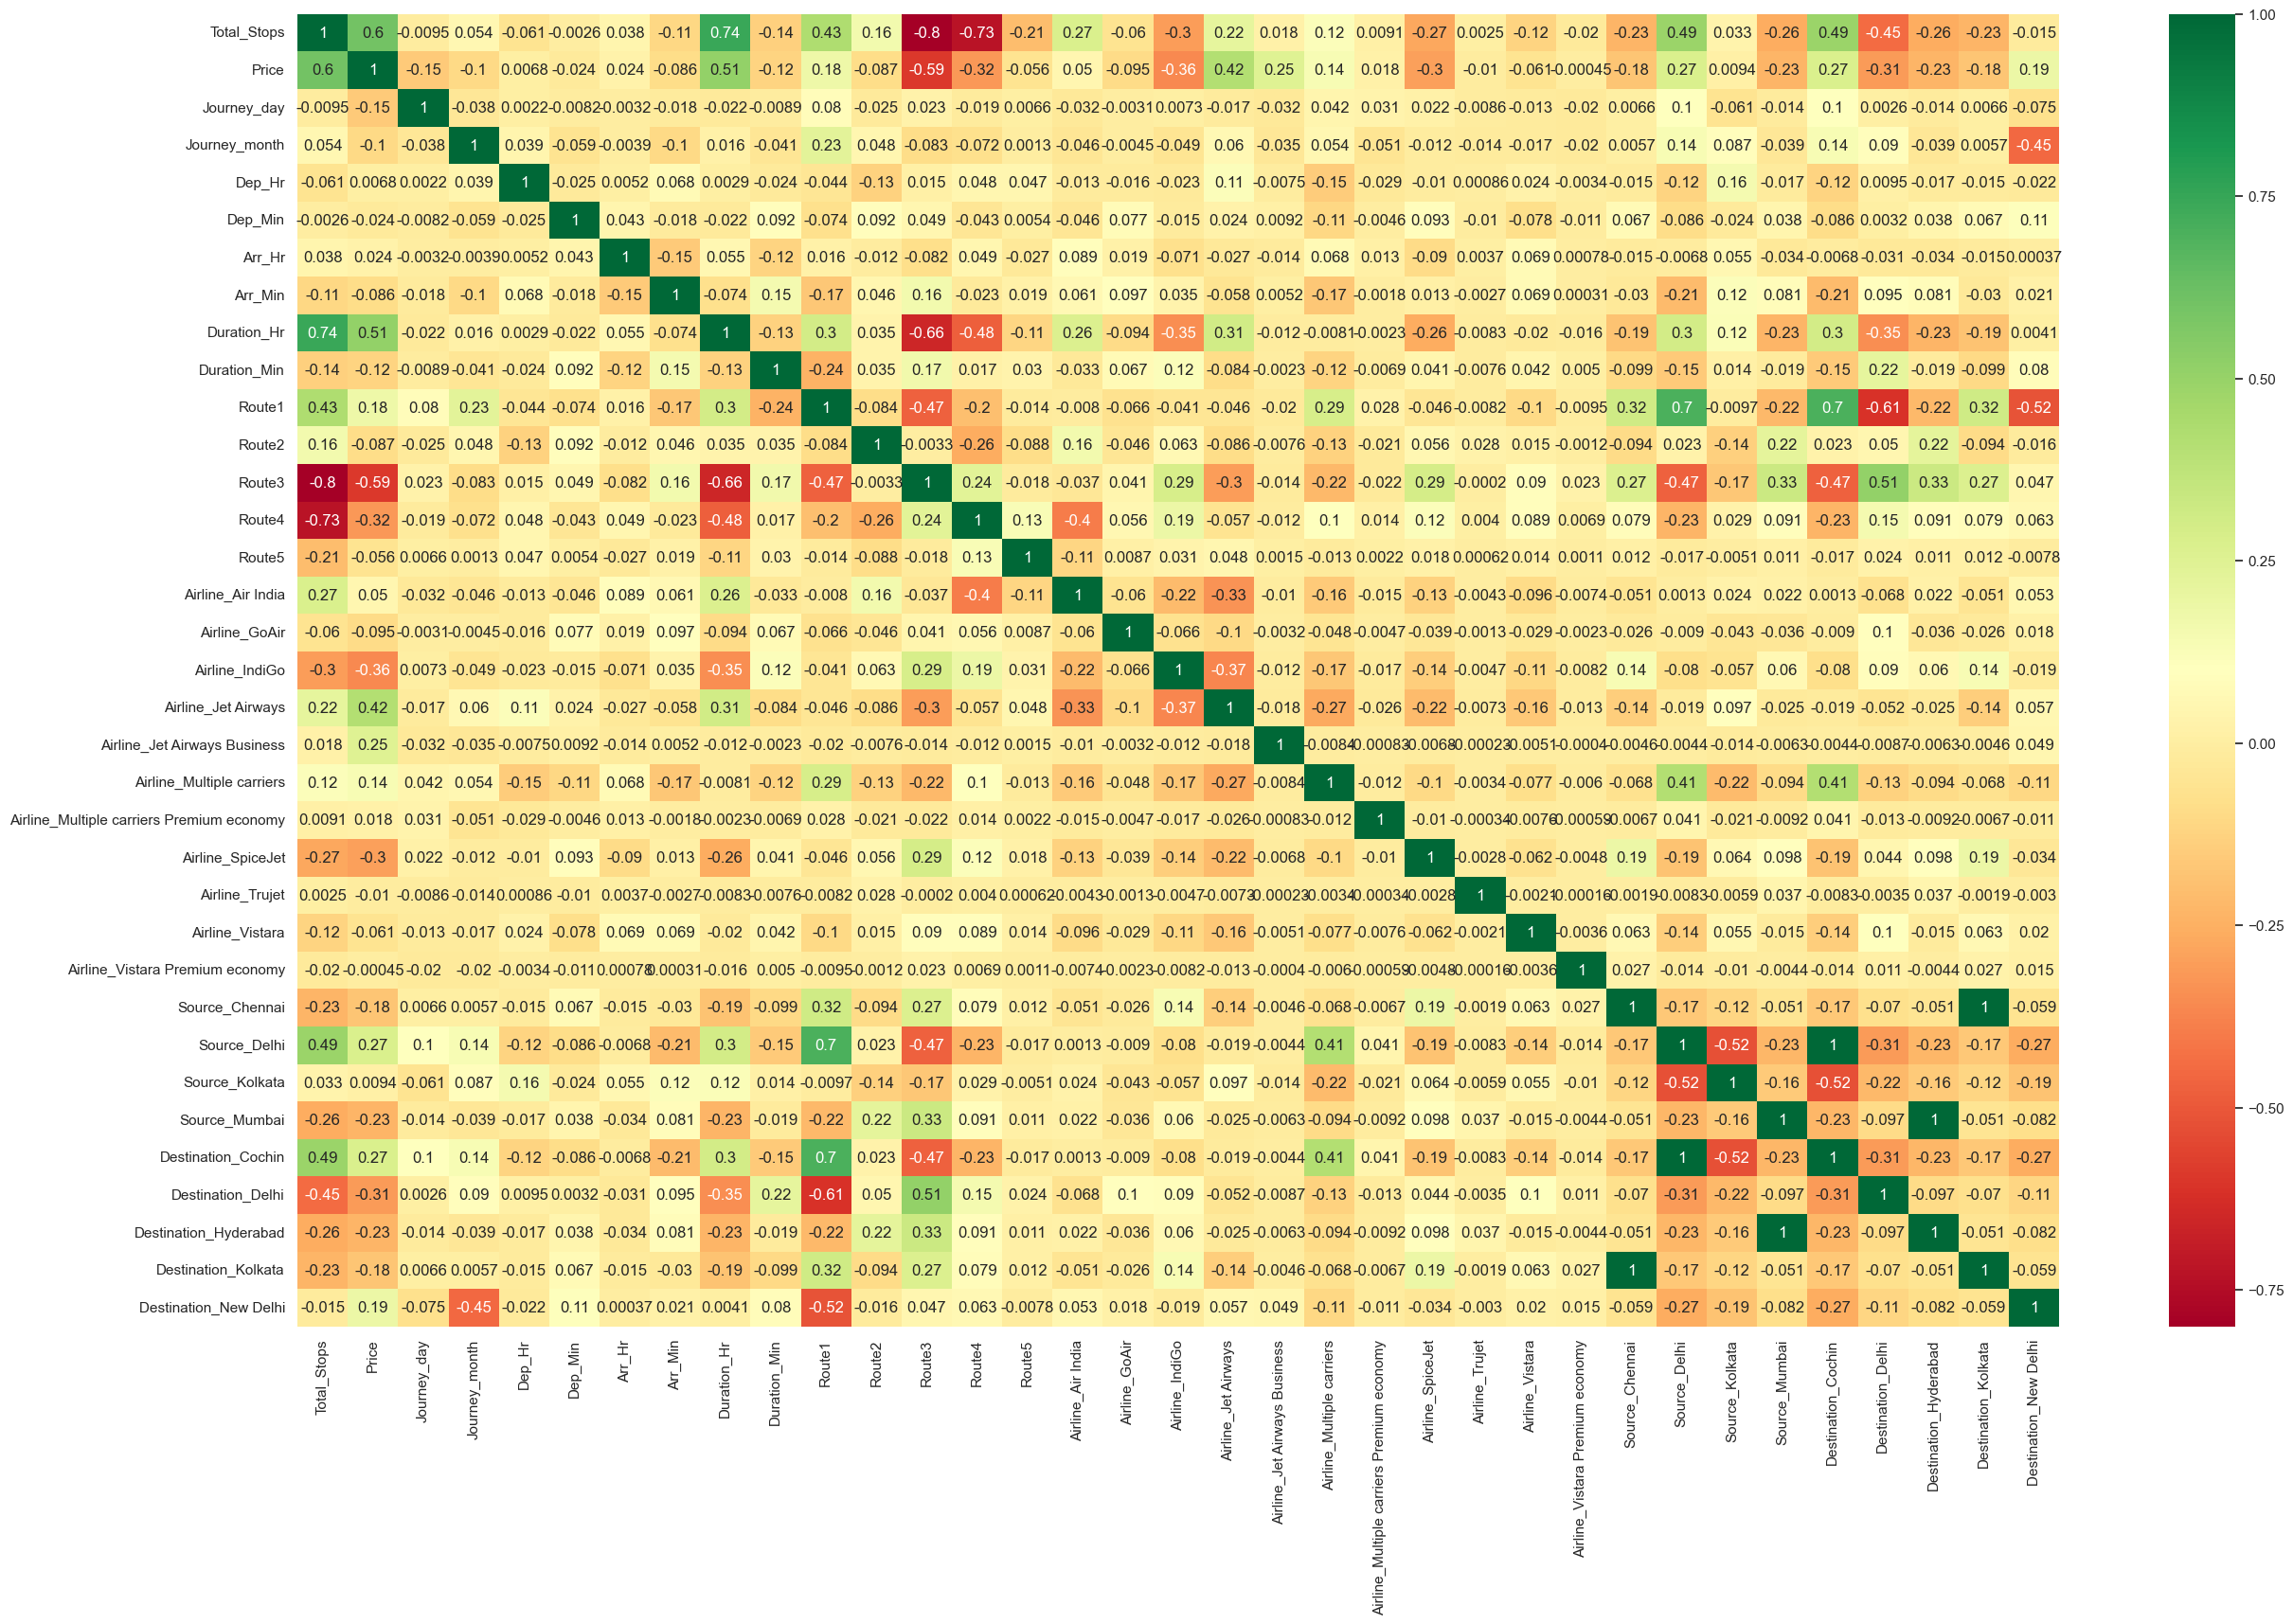

In [60]:
# Checking the correlation between Independant and dependant features

plt.figure(figsize = (30,18))

sns.heatmap(data1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# split data into x and y

In [61]:
x=data1.drop("Price",axis=1)

y=data1.Price

In [62]:
# Finding the important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()

selection.fit(x, y)

ExtraTreesRegressor()

In [63]:
print(selection.feature_importances_)

[1.02228585e-01 1.46305406e-01 5.29378144e-02 1.99055593e-02
 1.75927860e-02 2.23639452e-02 1.37561994e-02 7.27890955e-02
 1.34357417e-02 9.67926640e-03 2.17214260e-02 2.40286340e-01
 1.92878824e-02 4.25194797e-04 7.41475302e-03 1.32697156e-03
 1.48489776e-02 9.58926034e-02 6.54040656e-02 2.32097232e-02
 8.45850498e-04 2.22215053e-03 1.18698372e-04 5.09071421e-03
 7.63756830e-05 2.84677527e-04 1.70242535e-03 1.86754555e-03
 4.01922519e-03 1.92879320e-03 1.00603231e-03 3.10890241e-03
 3.63987117e-04 1.65522860e-02]


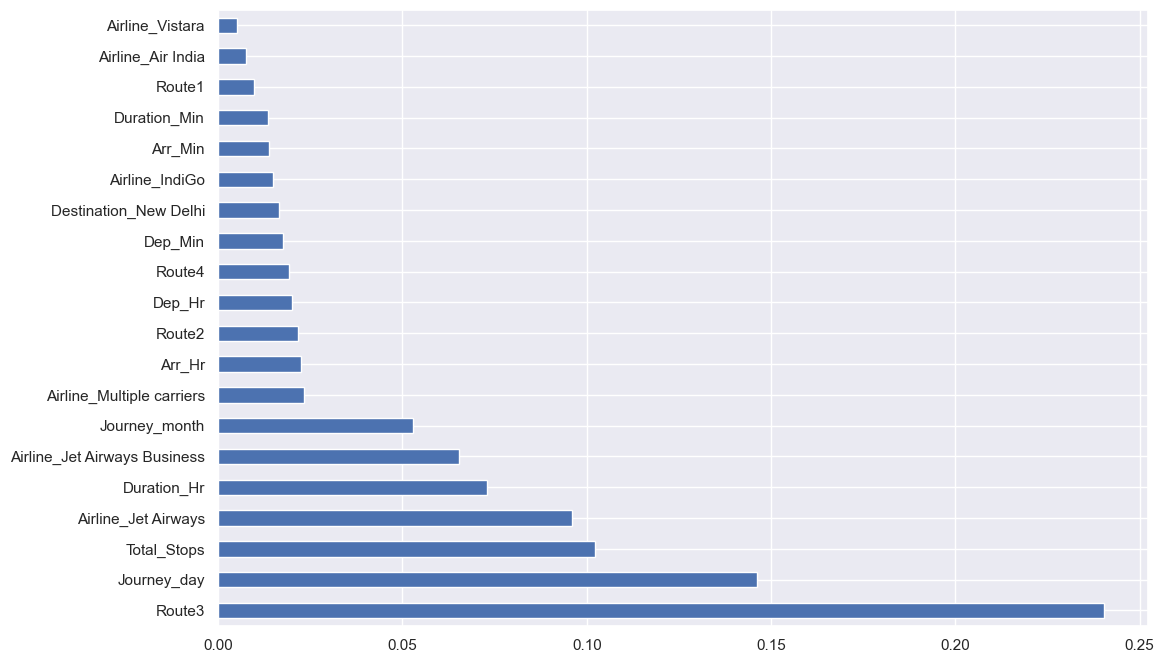

In [64]:
# Plotting graphs of feature importance for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

### **Insight**:

 * **Route3 is the most important feature**

## train_test_split

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [66]:
print("shape of x train :",x_train.shape)

print("shape of x_test  :",x_test.shape)

print("shape of y_train :",y_train.shape)

print("shape of y_test  :",y_test.shape)

shape of x train : (8545, 34)
shape of x_test  : (2137, 34)
shape of y_train : (8545,)
shape of y_test  : (2137,)


# Model Fitting

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Using Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()

reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
y_pred_rf = reg_rf.predict(x_test)

In [70]:
reg_rf.score(x_train, y_train)

0.9544744348631186

In [71]:
reg_rf.score(x_test, y_test)


0.7980534197218183

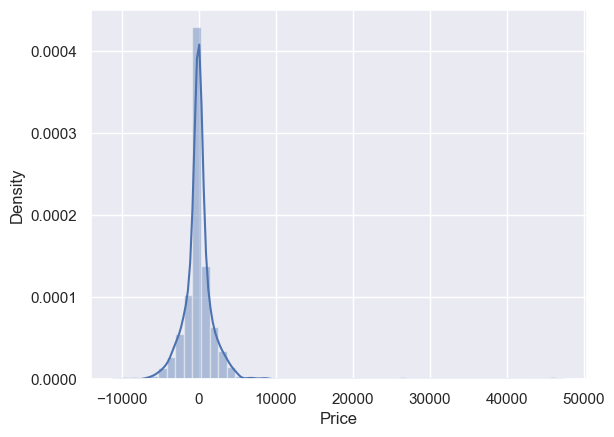

In [72]:
sns.distplot(y_test-y_pred_rf)
plt.show()

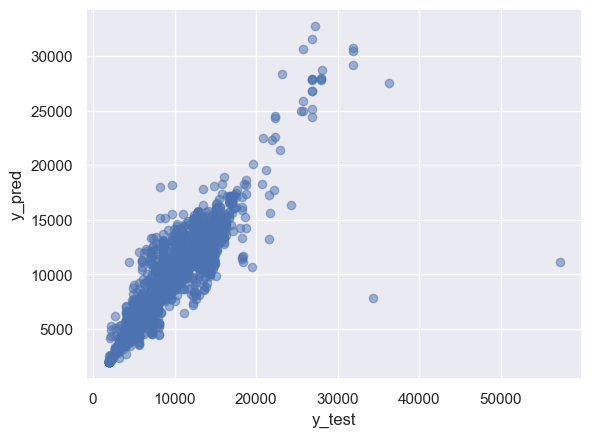

In [73]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

MAE: 1157.5558221527729
MSE: 4354383.538430012
RMSE: 2086.715969754871


In [75]:
score_rf=round(r2_score(y_test, y_pred_rf)*100,2)

print("The r2 score achieved using Random Forest is:"+str(score_rf)+" %")

The r2 score achieved using Random Forest is:79.81 %


### Hyperparameter Tuning in Random Forest

**n_estimators** = number of trees in the foreset

**max_features** =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

**max_depth** =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data

**min_samples_split** =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

**min_samples_leaf** = minimum number of data points allowed in a leaf node

**bootstrap** = method for sampling data points (with or without replacement)

Choosing RandomizedSearchCV method for hyperparameter tuning since it is fast

In [76]:
from sklearn.model_selection import RandomizedSearchCV


In [77]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [78]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [79]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator= reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =10, cv =5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
rf_random. best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
rf=RandomForestRegressor(n_estimators= 700,
                      min_samples_split= 15,
                      min_samples_leaf= 1,
                      max_features= 'auto',
                      max_depth=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [82]:
y_pred_rf2=rf.predict(x_test)

In [83]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf2))

print('MSE:', mean_squared_error(y_test, y_pred_rf2))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf2)))

MAE: 1128.8517165102703
MSE: 3957249.5205669357
RMSE: 1989.2836702106956


In [84]:
score_rf2=round(r2_score(y_test, y_pred_rf2)*100,2)

print("The r2 score achieved using Random Forest after hyper parameter tuning is:"+str(score_rf2)+" %")

The r2 score achieved using Random Forest after hyper parameter tuning is:81.65 %


## Using Gradient Boosting

In [85]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor() ## object creation

gb.fit(x_train,y_train) ## fitting the data

y_pred_gb=gb.predict(x_test)#predicting the price

In [86]:
gb.score(x_train,y_train)

0.7930525704568844

In [87]:
print('MAE:', mean_absolute_error(y_test, y_pred_gb))

print('MSE:', mean_squared_error(y_test, y_pred_gb))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))

MAE: 1500.9084847887125
MSE: 4552707.442240365
RMSE: 2133.7074406395


In [88]:
score_gb=round(r2_score(y_test, y_pred_gb)*100,2)

print("The r2 score achieved using  Gradient Boosting is: "+str(score_gb)+" %")

The r2 score achieved using  Gradient Boosting is: 78.89 %


### Hyper parameter tunning in Gradient boosting

In [89]:
from sklearn.model_selection import RandomizedSearchCV

params = {"n_estimators":[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    "criterion":("squared_error", "friedman_mse", "absolute_error","poisson"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
    "max_features" :("auto", "sqrt")
}

In [90]:
gb_random= RandomizedSearchCV(gb, params,random_state=42, scoring="r2", n_jobs=-1, verbose=2,n_iter=10, cv=5)

gb_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ('squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ('auto', 'sqrt'),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [91]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'squared_error'}

In [92]:
gb2=GradientBoostingRegressor(n_estimators= 200,
                 min_samples_split= 2,
                 min_samples_leaf =4, 
                 max_features= 'sqrt', 
                 max_depth= 5, 
                 criterion= 'squared_error')

gb2.fit(x_train, y_train)#training 

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          max_features='sqrt', min_samples_leaf=4,
                          n_estimators=200)

In [93]:
y_pred_gb2=gb2.predict(x_test)#testing

In [94]:
score_gb2=round(r2_score(y_test, y_pred_gb2)*100,2)

print("The r2 score achieved using  Gradient boost after Hyper parameter tuning is: "+str(score_gb2)+" %" )

The r2 score achieved using  Gradient boost after Hyper parameter tuning is: 85.14 %


## Using XGBOOST

In [95]:
#importing the model library
from xgboost import XGBRegressor

#xgb_r = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

xgb= XGBRegressor() ## object creation

xgb.fit(x_train,y_train)# fitting the data

y_pred_xgb=xgb.predict(x_test)#predicting the price

In [96]:
xgb.score(x_train,y_train)

0.9374002059042551

In [97]:
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))

print('MSE:', mean_squared_error(y_test, y_pred_xgb))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

MAE: 1084.49973895118
MSE: 2925007.5458905236
RMSE: 1710.2653437085496


In [98]:
score_xgb=round(r2_score(y_test, y_pred_xgb)*100,2)

print("The r2 score achieved using  XG boost is: ",score_xgb)

The r2 score achieved using  XG boost is:  86.43


### **Hyper parameter tunning in XG boost`**

**n_estimators** =  no. of models

**max_depth** = The maximum depth of a tree

**learning_rate**=Typical final values to be used: 0.01-0.3

**gamma**=   
*  Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 

*   Ranges from 0 to ∞.


        
**subsample**=  
*  no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
*  Lower values make the algorithm more conservative and prevents overfitting but too 
*  small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)

**colsample_bytree**=
*  Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
*  ie., % of features should be taken for each tree

In [99]:
from sklearn.model_selection import RandomizedSearchCV

params={'max_depth':[3,4,5,6],
        'learning_rate':[0.1,0.2,0.3] ,
        'n_estimators':[int(x) for x in np.linspace(start=200, stop=2000, num=10)] ,
        'gamma':[0, 1, 2, 3, 4], 
        'subsample':[0.5,0.7,1] ,
        'colsample_bytree':[0.5,0.7,1]}

In [100]:
xgb_rcv= RandomizedSearchCV(xgb, scoring='r2',param_distributions=params , n_iter=100, cv=3, random_state=35, n_jobs=-1)
                              
xgb_rcv.fit(x_train, y_train) ##training data on randomsearch cv.

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 1, 2, 3, 4],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=35, scoring='r2')

In [101]:
xgb_rcv.best_params_ 

{'subsample': 1,
 'n_estimators': 1200,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 3,
 'colsample_bytree': 0.5}

In [102]:
xgb2=XGBRegressor(subsample= 1,
 n_estimators= 1200,
 max_depth= 4,
 learning_rate= 0.1, 
 gamma=3,
 colsample_bytree= 0.5)

xgb2.fit(x_train, y_train)#training 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [103]:
y_pred_xgb2=xgb2.predict(x_test)#testing

In [104]:
score_xgb2=round(r2_score(y_test, y_pred_xgb2)*100,2)

print("The r2 score achieved using  XG boost after hyper parameter tuning is: "+str(score_xgb2)+" %" )

The r2 score achieved using  XG boost after hyper parameter tuning is: 86.79 %


## Using LinearRegression

In [105]:
## importing the model library 
from sklearn.linear_model import LinearRegression

lr=LinearRegression() ## creating the model object 

lr.fit(x_train,y_train) ## fitting the training data.

y_pred_lr=lr.predict(x_test) ## prediciton from model

In [106]:
lr.score(x_train,y_train)

0.6328502258280988

In [107]:
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

MAE: 1949.196094121028
MSE: 7956877.443964536
RMSE: 2820.7937613311146


In [108]:
score_lr=round(r2_score(y_test, y_pred_lr)*100,2)
print("The r2 score achieved using  Linear Regression is: "+str(score_lr)+" %" )

The r2 score achieved using  Linear Regression is: 63.1 %


## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor 

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [110]:
dt.score(x_train,y_train)

0.9693071159054724

In [111]:
print('MAE:', mean_absolute_error(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dt)))

MAE: 1292.097597878646
MSE: 5906976.551099153
RMSE: 2430.42723633092


In [112]:
score_dt = round(r2_score(y_test,y_pred_dt)*100,2)

print("The r2 score achieved using Decision Tree is: "+str(score_dt)+" %")

The r2 score achieved using Decision Tree is: 72.6 %


### Hyper parameter tuning in Decision Tree

In [113]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "criterion":("squared_error", "friedman_mse", "absolute_error","poisson"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
    "max_features" :("auto", "sqrt")
}

In [114]:
dt_rcv = RandomizedSearchCV(dt, params, scoring="r2",random_state=35, n_jobs=-1, verbose=1, cv=5)

dt_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ('squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ('auto', 'sqrt'),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   random_state=35, scoring='r2', verbose=1)

In [115]:
dt_rcv.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_features': 'auto',
 'max_depth': 13,
 'criterion': 'poisson'}

In [116]:
dt1=DecisionTreeRegressor(splitter='best',min_samples_split=4,min_samples_leaf= 13,max_features= 'auto',max_depth=13, criterion='poisson')

dt1.fit(x_train,y_train)

y_pred_dt1 = dt1.predict(x_test)


In [117]:
score_dt1 = round(r2_score(y_test,y_pred_dt1)*100,2)

print("The r2 score  achieved using Decision Tree after hyper parameter tuning  is: "+str(score_dt1)+" %")

The r2 score  achieved using Decision Tree after hyper parameter tuning  is: 79.1 %


# Conclusion

In [118]:
scores = [score_rf2,score_gb2,score_xgb2,score_lr,score_dt1]
algorithms = ["Random Forest","GradientBoost","XGBoost","Linear Regression","Decision Tree"]    

for i in range(len(algorithms)):
    print("The r2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The r2 score achieved using Random Forest is: 81.65 %
The r2 score achieved using GradientBoost is: 85.14 %
The r2 score achieved using XGBoost is: 86.79 %
The r2 score achieved using Linear Regression is: 63.1 %
The r2 score achieved using Decision Tree is: 79.1 %


<Axes: xlabel='Algorithms', ylabel='r2 score'>

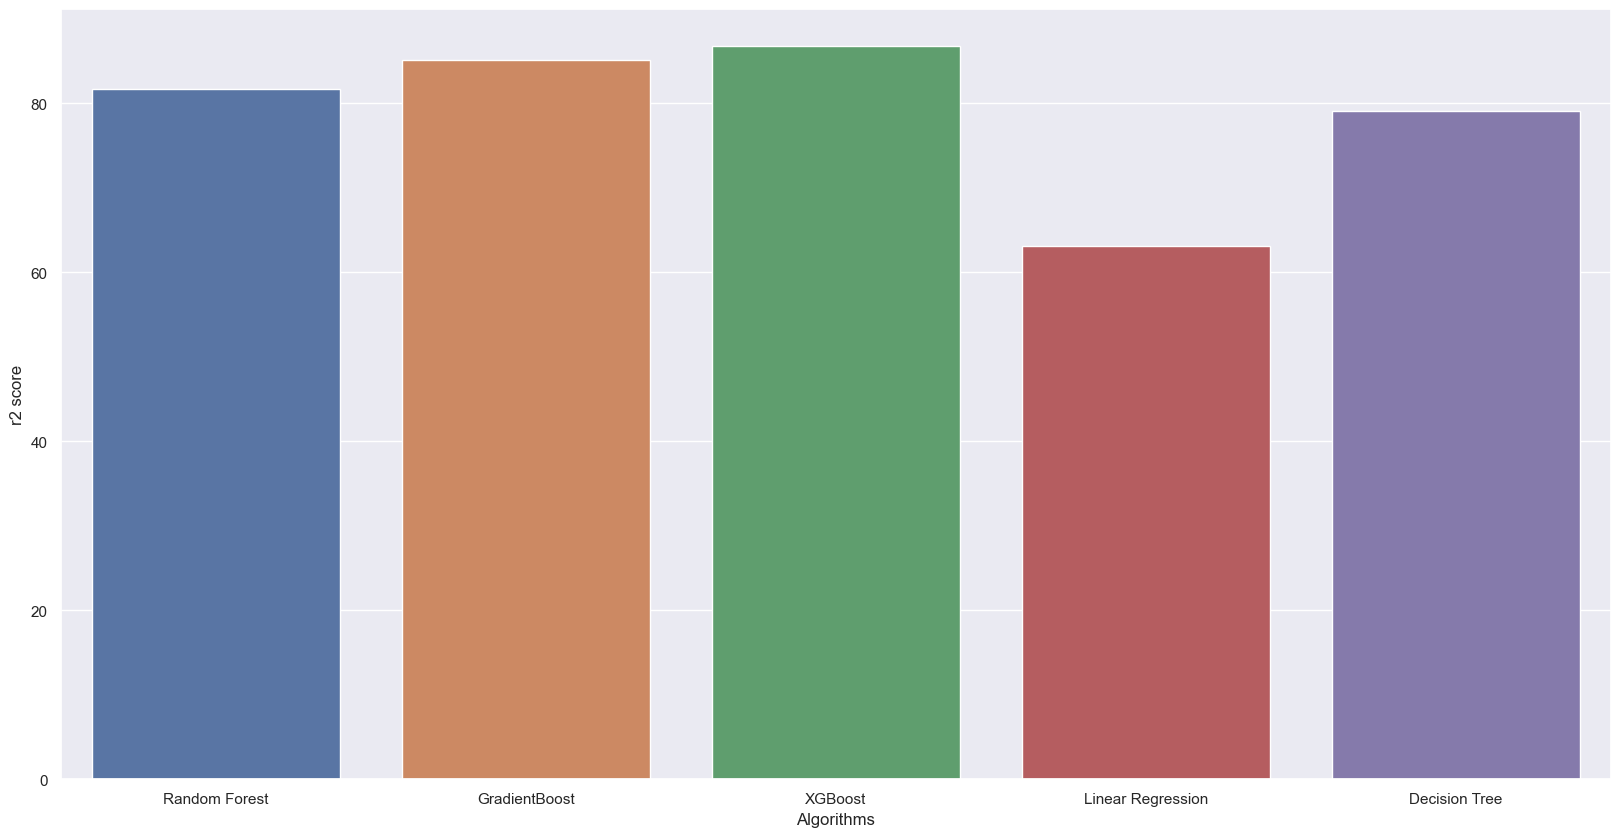

In [119]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("r2 score")

sns.barplot(x=algorithms,y=scores)

* **Within all the four models XG Boost gives more r2 score followed closely by GradientBoost for testing data.**
* **While Linear Regression had the lowest performance.**
* **ie; Here the best model is XG Boost.**